# Finding Similar Time-Series
> Quasi-experimentation is something I've been interested in experimenting with (pun intended); part of the process is determining how similar a set of time-series are in order to pick geographic regions to compare

- toc: false
- branch: master
- badges: true
- categories: [viz, jupyter]
- hide: true
- search_exclude: false

Ever since watching this presentation about [quasi-experiments at Netflix](https://channels.theinnovationenterprise.com/presentations/quasi-experimentation-at-netflix-beyond-a-b-testing) I've been trying to understand more about how to operationalize a similar model of testing. In my opinion, I've found multi-channel attribution to be difficult because there are only so many insights I can believe. For example, finding a campaign that consistently results in $0 of revenue is probably accurate; when I've dug into issues like that further, et voilà, I've find ad fraud. On the other hand, an attribution tool that promises insights into the return from paid social media traffic (which I've typically seen to be >80% smartphone traffic) seems dubious. While quasi-experiments aren't perfect, I find the premise more promising than tying together a bunch of cookies -- and much, much better than utilizing the sketchy companies that have resolved cookies/email addresses/devices to a person. There are also some really cool use cases for this type of approach, like Airbnb [experimenting with UX/SEO optimization](https://medium.com/airbnb-engineering/experimentation-measurement-for-search-engine-optimization-b64136629760).

While there's a lot of details that go into setting up infrastructure to support near-experimental design with marketing platforms, one of the starting points is finding which geographic regions are most similar so they can serve as control/test groups. One method that comes up oftern is dynamic time warping, a great example of which is the `MarketMatching` [R package ](https://github.com/klarsen1/MarketMatching):
> The `MarketMatching` package implements the workflow described above by essentially providing an easy-to-use "wrapper" for the `dtw` and `CausalImpact`. The function `best_matches()` finds the best control markets for each market by looping through all viable candidates in a parallel fashion and then ranking by distance and/or correlation. The resulting output object can then be passed to the `inference()` function which then analyzes the causal impact of an event using the pre-screened control markets.

If you'd like to learn more about dynamic time warping and classification problems for time-series, see Aileen Nielsen's book [Practical Time Series Analysis](https://www.oreilly.com/library/view/practical-time-series/9781492041641/).

Now on to the code. Of course, to make things more difficult for myself I want to try this out in Python...

In [13]:
%matplotlib inline
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

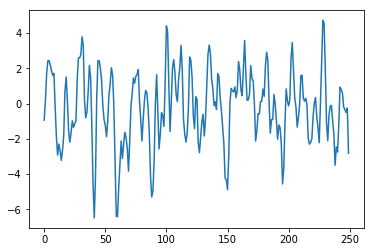

In [38]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, nsample=250, distrvs=randn)
# model = sm.tsa.ARMA(y, (2, 2)).fit(trend='nc', disp=0)
# model.params

fig, ax = plt.subplots()
ax.plot(y, label="Data") 

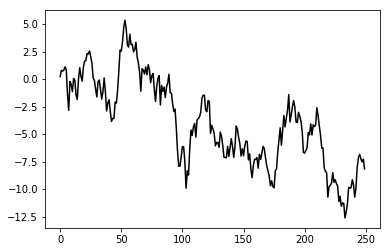

In [31]:
fig, ax = plt.subplots()
ax.plot(randn(250).cumsum(), 'k', label='one')

In [30]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw